In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

sys.path.append("..")

import Models.OWID as owid
import Models.SIRD as sird
import Models.GradDescModels as gdm
import Models.process as process

In [5]:
#load our model fits
import csv

inputFile = open('..\\..\\Data\\AIRD fits\\fitsMeasures.csv', 'r')
rd = csv.reader(inputFile, delimiter=',') #reader

fitDict = {}
for row in rd:
    fitDict[row[0]] = list(map(float, row[1:]))
    
inputFile.close()

1 New best error:  6.139088105951481e-05
5 New best error:  2.049524875751302e-05
48 New best error:  1.9823607050775482e-05
76 New best error:  1.9152439985232085e-05
100 New best error:  1.4106786410047872e-05
116 New best error:  1.3241245321493179e-05
147 New best error:  9.857054369293665e-06


..\Models\GradDescModels.py:474: RuntimeWarning: overflow encountered in double_scalars
  diffI = beta*I[t] - gamma*I[t]
..\Models\GradDescModels.py:475: RuntimeWarning: invalid value encountered in double_scalars
  I[t+1] = diffI + I[t]
..\Models\GradDescModels.py:486: RuntimeWarning: overflow encountered in double_scalars
  error = error + ((y[t] - x[t])**2)*wDecay**(len(y)-t+1) #squared error


8 New best error:  2.0759474278102163e-06


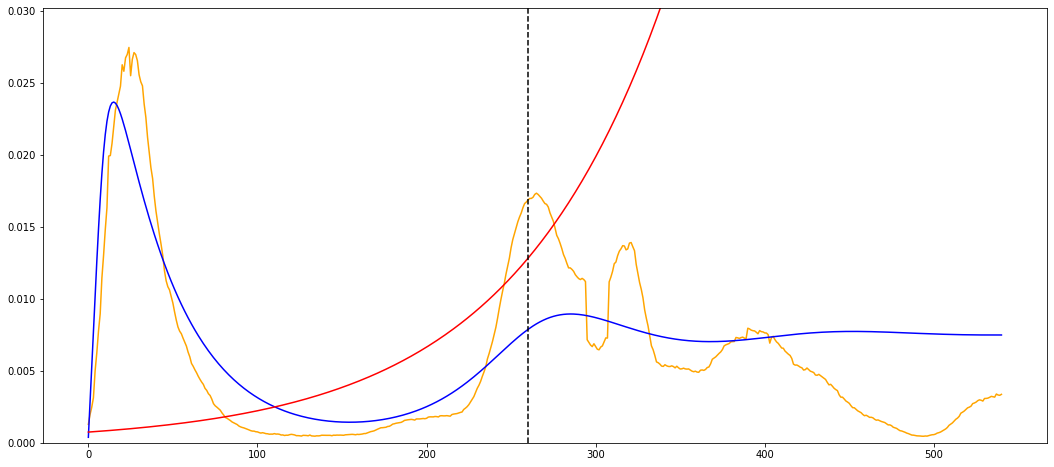

In [52]:
dates, I, R, D, V = owid.LoadCountryNormal("Italy")

consts = [len(I), I[0], max(I), [len(I)]]

startSim = 260
sectionI=I[:startSim]
constsSection = [startSim, I[0], max(I), [startSim]] # fit only on range of [0:startSim] 

itParams =  gdm.getParams(sectionI, constsSection, randomIterCount=150)
itParamsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=50)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(I, color="orange")
ax.plot(gdm.simFunc(itParams, consts), color="blue")
ax.plot(gdm.simFuncConst(itParamsConst, consts), color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

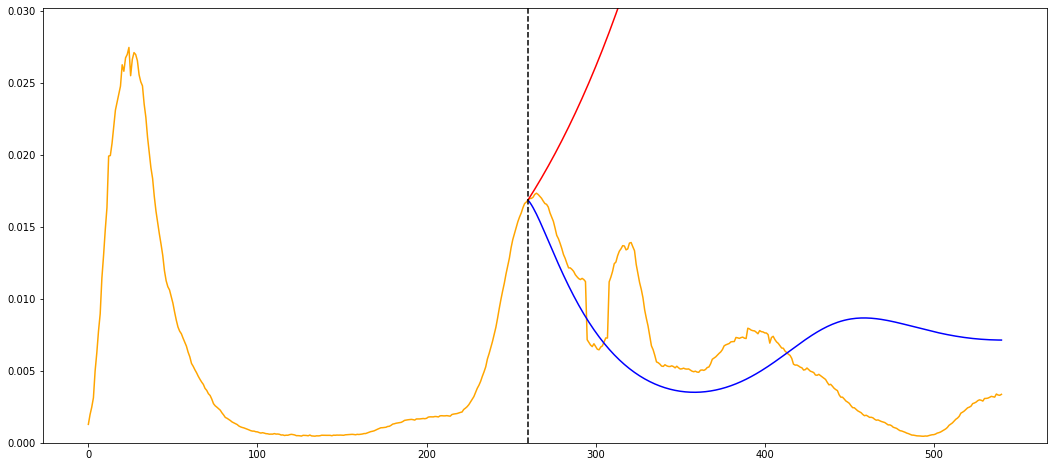

In [54]:
fig, ax = plt.subplots(figsize=(18,8))

itParams2 = itParams.copy()
itParamsConst2 = itParamsConst.copy()

itParamsConst2[0] = I[startSim] #set I[0] to I on the start sim date

simA, simI = gdm.simFunc(itParams, consts, giveA=True) #the normal simulation
itParams2[0] = simA[startSim] #set A[0] as what the simulated A was on the start sim date
itParams2[1] = I[startSim] #set I[0] to actual I on the start sim date

#simulations on sim date and on
simI = gdm.simFunc(itParams2, consts)
simConstI = gdm.simFuncConst(itParamsConst2, consts)

xSeries = np.arange(0,len(I),1)

ax.plot(xSeries, I, color="orange")
ax.plot(xSeries[startSim:], simI[:len(I)-startSim], color="blue")
ax.plot(xSeries[startSim:], simConstI[:len(I)-startSim], color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

..\Models\GradDescModels.py:50: RuntimeWarning: invalid value encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


0 New best error:  7.167972846301494e-05


..\Models\GradDescModels.py:50: RuntimeWarning: overflow encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


2 New best error:  5.048753693481267e-05


..\Models\GradDescModels.py:51: RuntimeWarning: overflow encountered in double_scalars
  diffI = gamma1*A[t] - nu*I[t]
..\Models\GradDescModels.py:51: RuntimeWarning: invalid value encountered in double_scalars
  diffI = gamma1*A[t] - nu*I[t]
..\Models\GradDescModels.py:69: RuntimeWarning: overflow encountered in double_scalars
  error = error + ((y[t] - x[t])**2)*wDecay**(len(y)-t+1) #squared error


3 New best error:  2.8845013943656233e-05
4 New best error:  2.395617153193631e-05
6 New best error:  1.3847855366826905e-05
12 New best error:  1.3178819480410244e-05
13 New best error:  1.1267088881142603e-05
18 New best error:  7.957243484216557e-06
0 New best error:  9.897239243623344e-06


..\Models\GradDescModels.py:474: RuntimeWarning: overflow encountered in double_scalars
  diffI = beta*I[t] - gamma*I[t]
..\Models\GradDescModels.py:475: RuntimeWarning: invalid value encountered in double_scalars
  I[t+1] = diffI + I[t]
..\Models\GradDescModels.py:486: RuntimeWarning: overflow encountered in double_scalars
  error = error + ((y[t] - x[t])**2)*wDecay**(len(y)-t+1) #squared error


10 New best error:  9.871364623217345e-06
17 New best error:  9.79791684532999e-06
30 New best error:  1.1125215976442073e-06


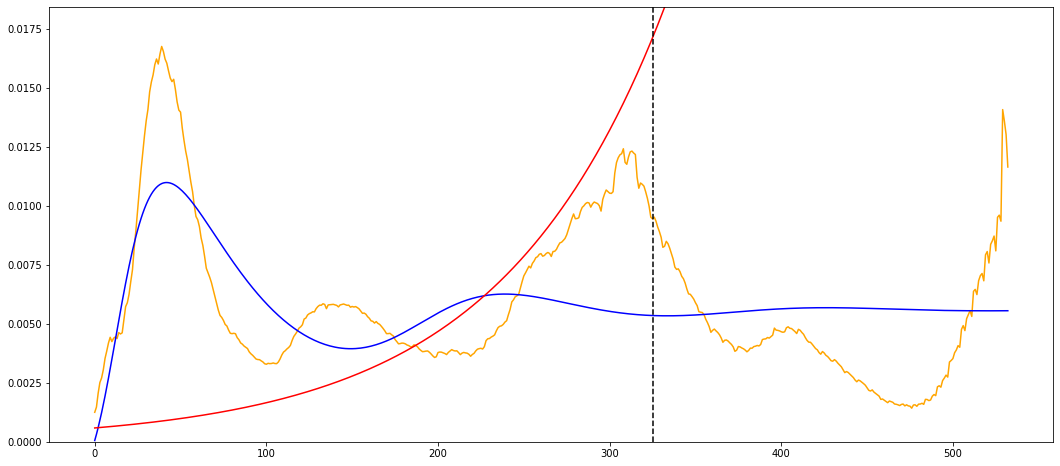

In [59]:
dates, I, R, D, V = owid.LoadCountryNormal("United States")

consts = [len(I), I[0], max(I), [len(I)]]

startSim = 325
sectionI=I[:startSim]
constsSection = [startSim, I[0], max(I), [startSim]] # fit only on range of [0:startSim] 

usParams =  gdm.getParams(sectionI, constsSection, randomIterCount=100)
usParamsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=50)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(I, color="orange")
ax.plot(gdm.simFunc(usParams, consts), color="blue")
ax.plot(gdm.simFuncConst(usParamsConst, consts), color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

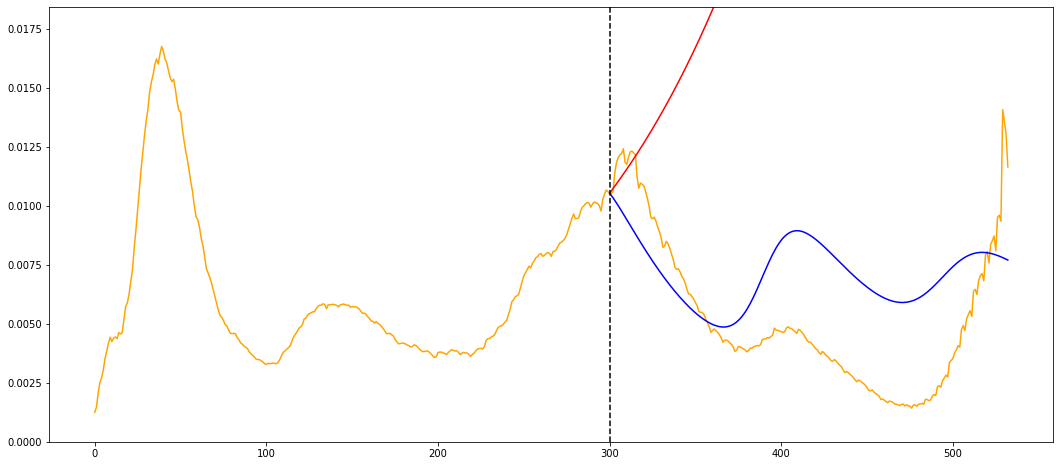

In [57]:
fig, ax = plt.subplots(figsize=(18,8))

usParams2 = usParams.copy()
usParamsConst2 = usParamsConst.copy()

usParamsConst2[0] = I[startSim] #set I[0] to I on the start sim date

simA, simI = gdm.simFunc(usParams, consts, giveA=True) #the normal simulation
usParams2[0] = simA[startSim] #set A[0] as what the simulated A was on the start sim date
usParams2[1] = I[startSim] #set I[0] to actual I on the start sim date

#simulations on sim date and on
simI = gdm.simFunc(usParams2, consts)
simConstI = gdm.simFuncConst(usParamsConst2, consts)

xSeries = np.arange(0,len(I),1)

ax.plot(xSeries, I, color="orange")
ax.plot(xSeries[startSim:], simI[:len(I)-startSim], color="blue")
ax.plot(xSeries[startSim:], simConstI[:len(I)-startSim], color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')